In [1]:
import numpy as np
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Load the dataset
import pickle

import numpy as np
import random
import warnings

import scipy.sparse as sp
 
import pickle
from scipy.sparse import eye
from scipy.sparse.linalg import inv

import scipy.sparse as sp
from scipy.sparse import csr_matrix, csgraph
from scipy.sparse import triu, tril, csr_matrix, coo_matrix
 
 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from scipy.sparse import random as sparse_random

from scipy.sparse import csr_matrix, csgraph
from scipy.sparse.linalg import inv
from numpy.linalg import pinv

from data_loader import *

from sparsify import *
    

In [2]:

dataset_list = ['political-blog', 'citeseer', 'cora', 'mnist-tr-nei10', 'pubmed', 'blogcatalog']

dataset_list = ['political-blog','citeseer','cora']#,  'pubmed', 'blogcatalog']#, 'youtube', 'ogbn-arxiv']



In [3]:
""" 

# Create an adjacency matrix for a complete graph of 10 nodes

# Initialize the parameters for the graph
n = 100  # Number of nodes
p = 0.1  # Probability of random connections

# Create an empty adjacency matrix
adj_matrix = np.zeros((n, n))

# Populate the matrix
for i in range(n):
    for j in range(i + 1, n):
        if i % 10 == 0 or j % 10 == 0:
            # Every 10th node is connected to every other node
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1
        elif np.random.rand() < p:
            # Randomly connect other nodes
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1
#adj_matrix = np.ones((n, n))

# Convert to a sparse CSR matrix
A = csr_matrix(adj_matrix)

U,_ = uniform_sparsify(A, 0.25)
print('done')
R,_ = resistive_sparsify(A, 0.25)
print('done')
I = influencer_sparsify(A, 10)
print('done')
plt.subplot(2,2,1)
plt.spy(A, markersize=1)


plt.subplot(2,2,2)
plt.spy(U, markersize=1)


plt.subplot(2,2,3)
plt.spy(R, markersize=1)

plt.subplot(2,2,4)
plt.spy(I, markersize=1)

"""


 

" \n\n# Create an adjacency matrix for a complete graph of 10 nodes\n\n# Initialize the parameters for the graph\nn = 100  # Number of nodes\np = 0.1  # Probability of random connections\n\n# Create an empty adjacency matrix\nadj_matrix = np.zeros((n, n))\n\n# Populate the matrix\nfor i in range(n):\n    for j in range(i + 1, n):\n        if i % 10 == 0 or j % 10 == 0:\n            # Every 10th node is connected to every other node\n            adj_matrix[i, j] = 1\n            adj_matrix[j, i] = 1\n        elif np.random.rand() < p:\n            # Randomly connect other nodes\n            adj_matrix[i, j] = 1\n            adj_matrix[j, i] = 1\n#adj_matrix = np.ones((n, n))\n\n# Convert to a sparse CSR matrix\nA = csr_matrix(adj_matrix)\n\nU,_ = uniform_sparsify(A, 0.25)\nprint('done')\nR,_ = resistive_sparsify(A, 0.25)\nprint('done')\nI = influencer_sparsify(A, 10)\nprint('done')\nplt.subplot(2,2,1)\nplt.spy(A, markersize=1)\n\n\nplt.subplot(2,2,2)\nplt.spy(U, markersize=1)\n\n\nplt.s

1222
55
political-blog_sparseinfluencer_c55_spmat
1222
political-blog_sparseuniform_p0.600000_spmat
1222
political-blog_sparseresistive_p0.600000_spmat
1000
1222
27
political-blog_sparseinfluencer_c27_spmat
1222
political-blog_sparseuniform_p0.350000_spmat
1222
political-blog_sparseresistive_p0.350000_spmat
1000
1222
14
political-blog_sparseinfluencer_c14_spmat
1222
political-blog_sparseuniform_p0.180000_spmat
1222
political-blog_sparseresistive_p0.180000_spmat
1000
1222
3
political-blog_sparseinfluencer_c3_spmat
1222
political-blog_sparseuniform_p0.070000_spmat
1222
political-blog_sparseresistive_p0.070000_spmat
1000
2110
7
citeseer_sparseinfluencer_c7_spmat
2110
citeseer_sparseuniform_p0.790000_spmat
2110
citeseer_sparseresistive_p0.790000_spmat
1000
2110
3
citeseer_sparseinfluencer_c3_spmat
2110
citeseer_sparseuniform_p0.590000_spmat
2110
citeseer_sparseresistive_p0.590000_spmat
1000
2110
2
citeseer_sparseinfluencer_c2_spmat
2110
citeseer_sparseuniform_p0.570000_spmat
2110
citeseer_

C:\Users\yifan\AppData\Local\Temp\ipykernel_31616\1812835918.py:99: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim([0, c*2])


2485
8
cora_sparseinfluencer_c8_spmat
2485
cora_sparseuniform_p0.770000_spmat
2485
cora_sparseresistive_p0.770000_spmat
1000
2485
4
cora_sparseinfluencer_c4_spmat
2485
cora_sparseuniform_p0.570000_spmat
2485
cora_sparseresistive_p0.570000_spmat
1000
2485
2
cora_sparseinfluencer_c2_spmat
2485
cora_sparseuniform_p0.490000_spmat
2485
cora_sparseresistive_p0.490000_spmat
1000
2485
0
2485
2485
1000


NameError: name 'adsf' is not defined

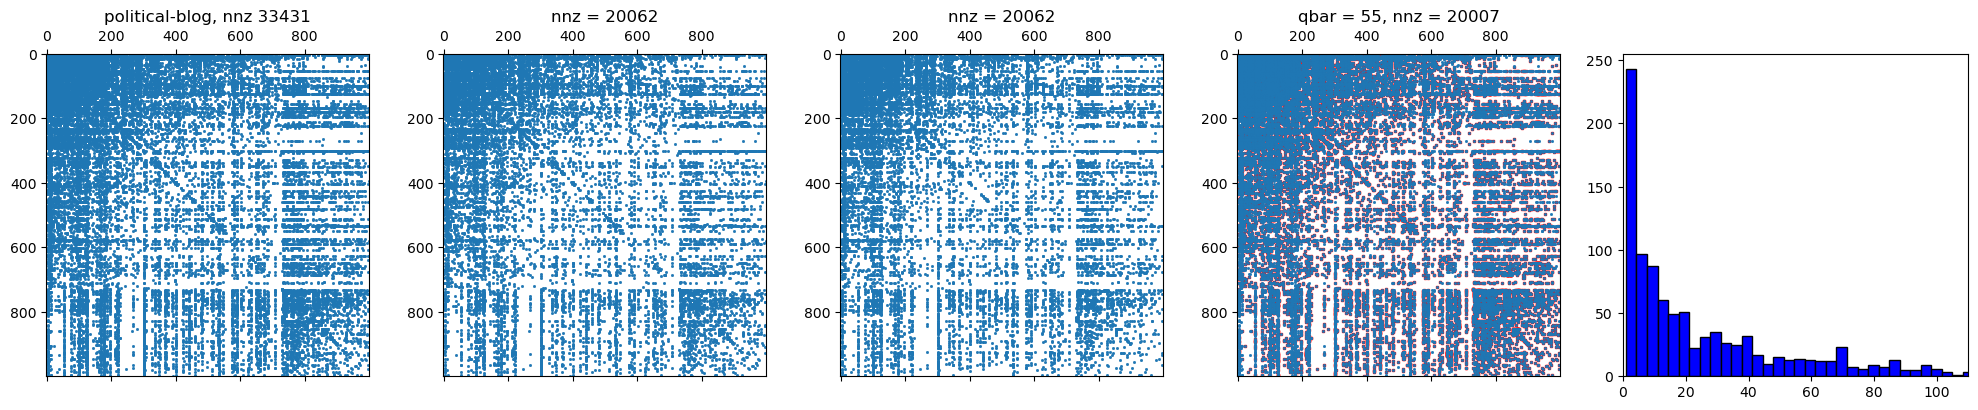

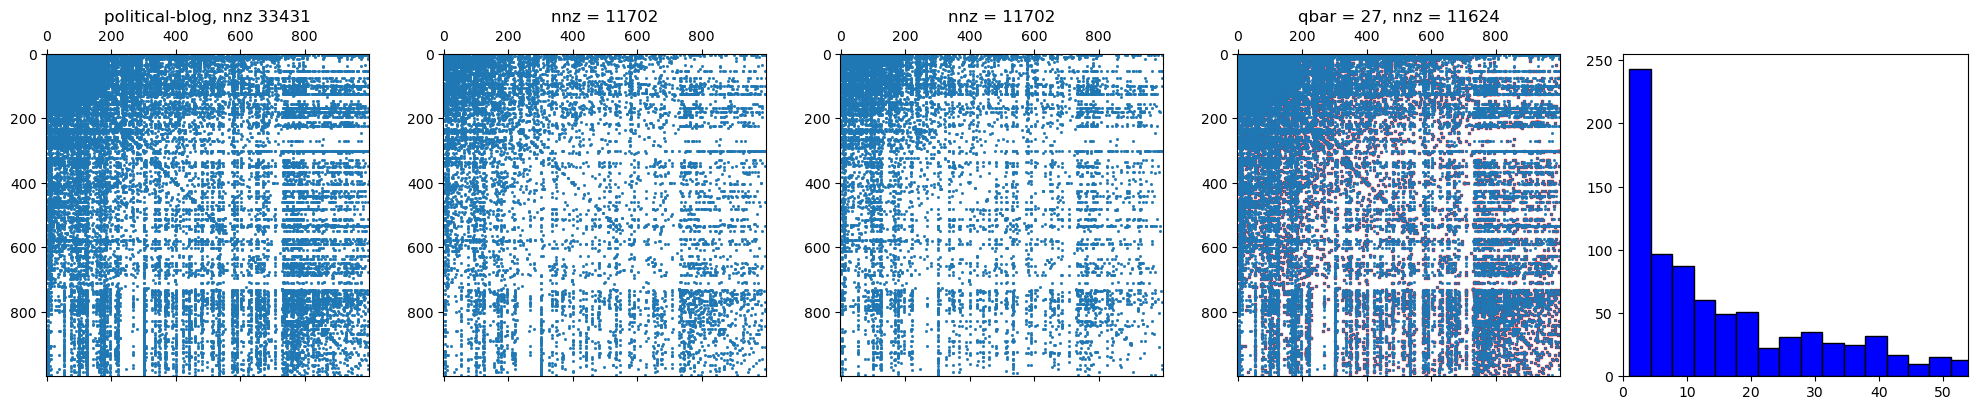

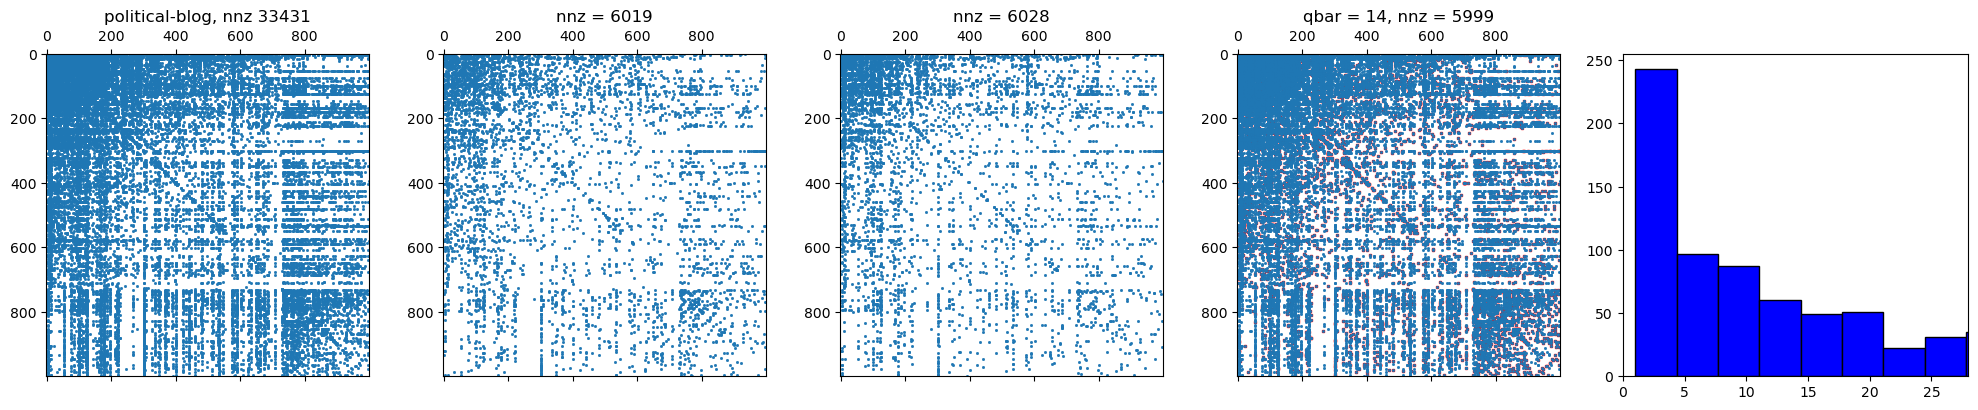

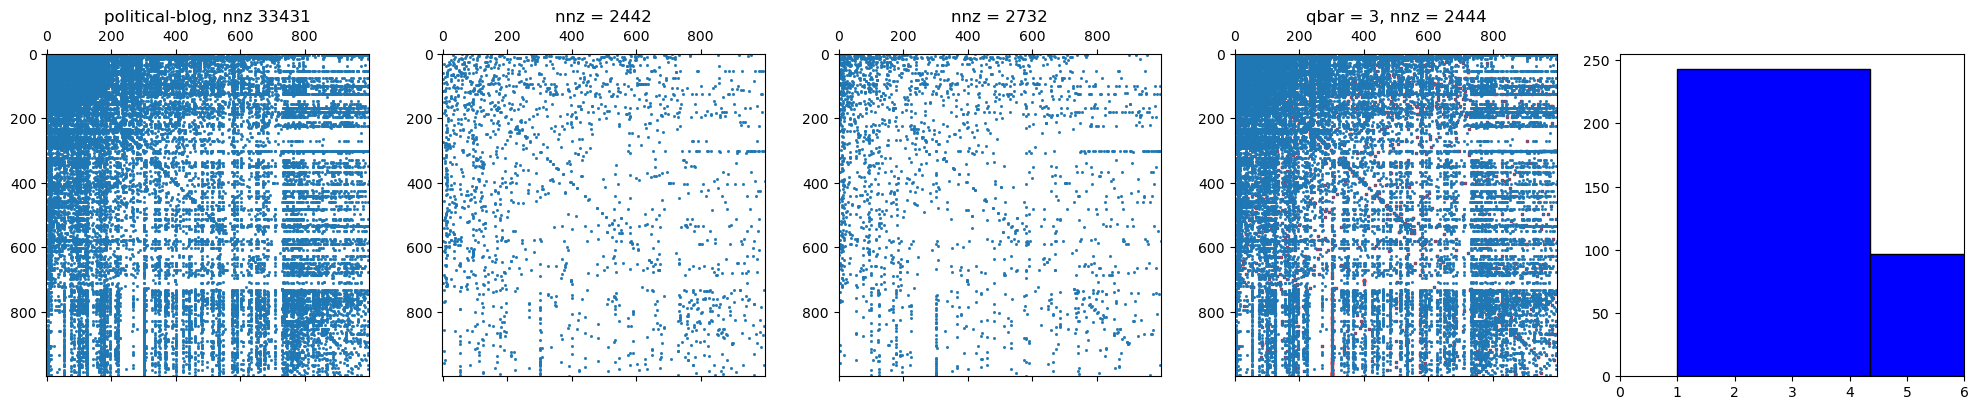

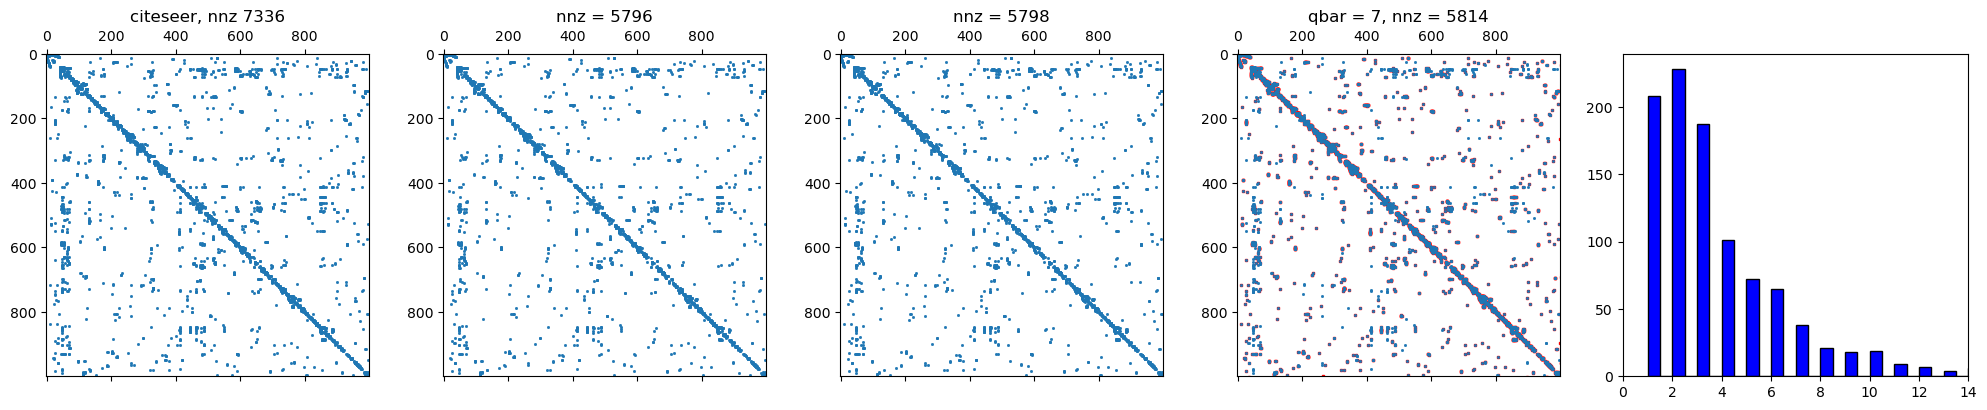

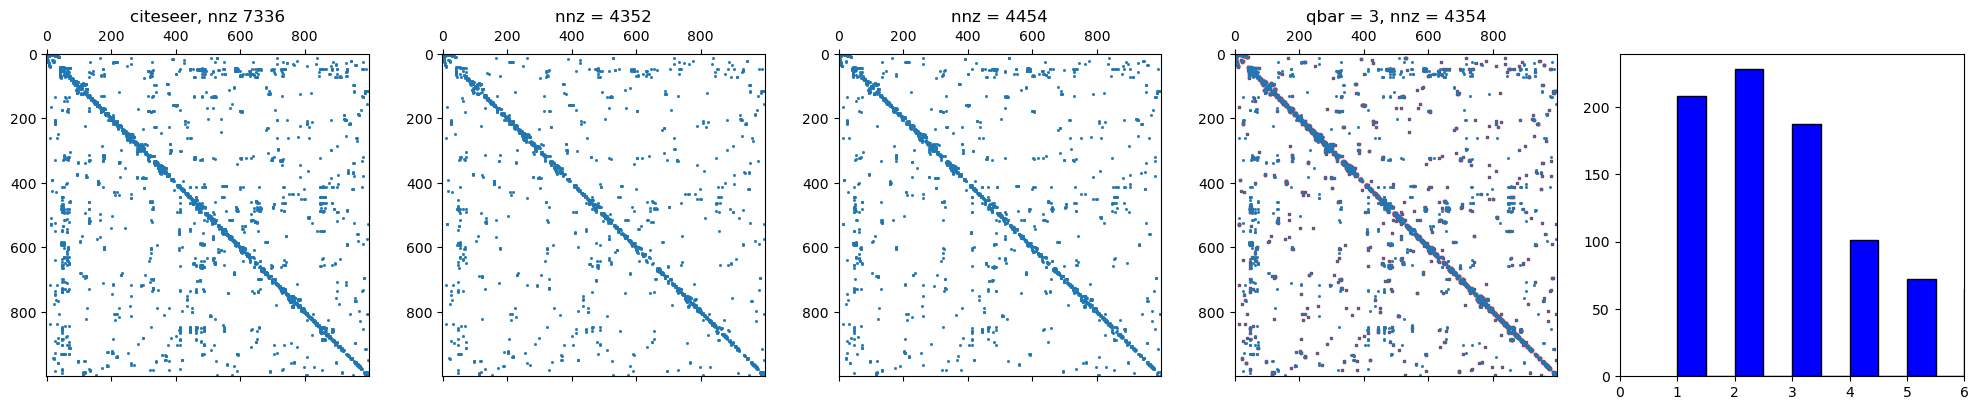

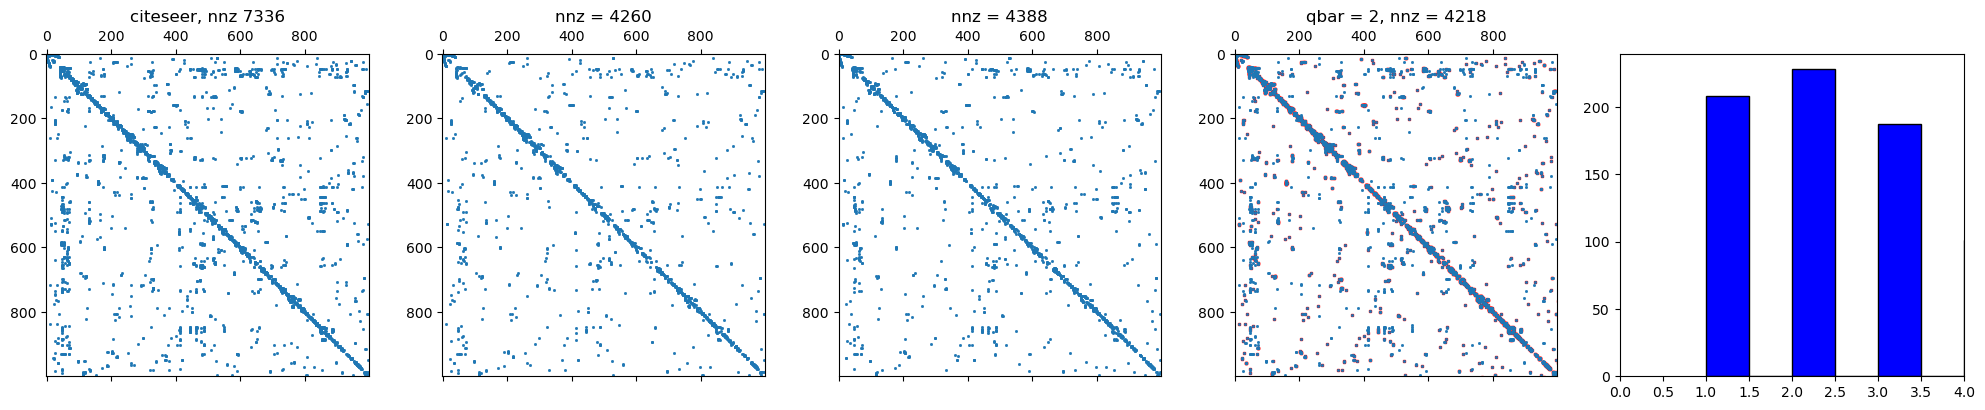

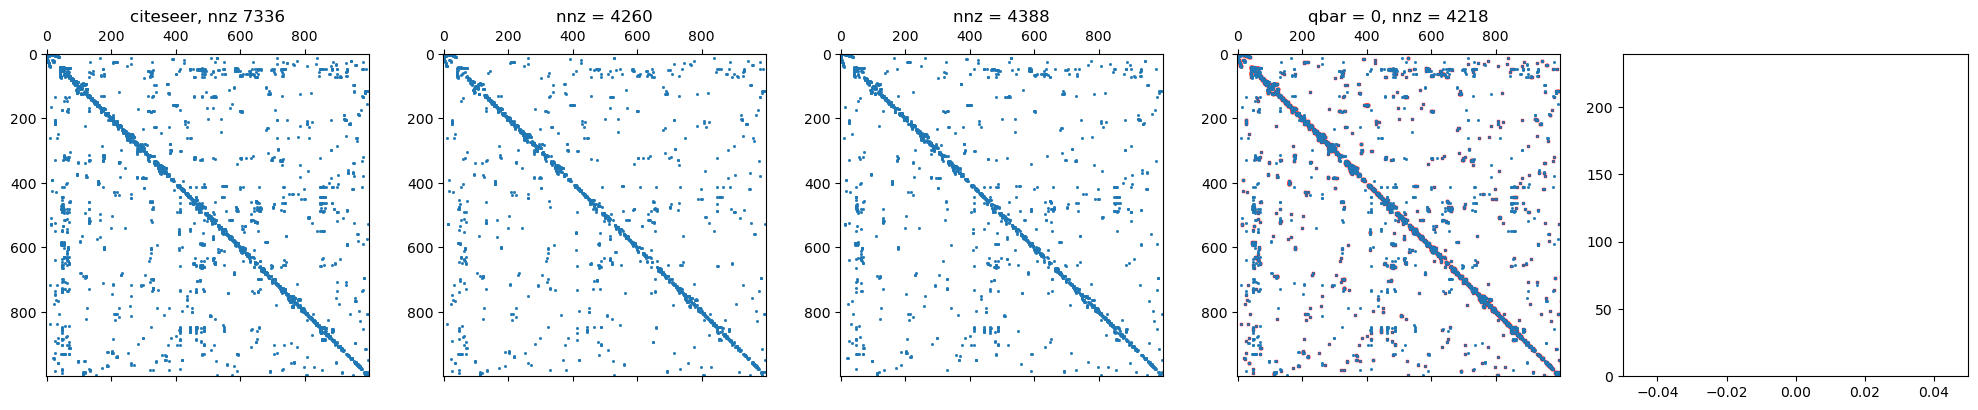

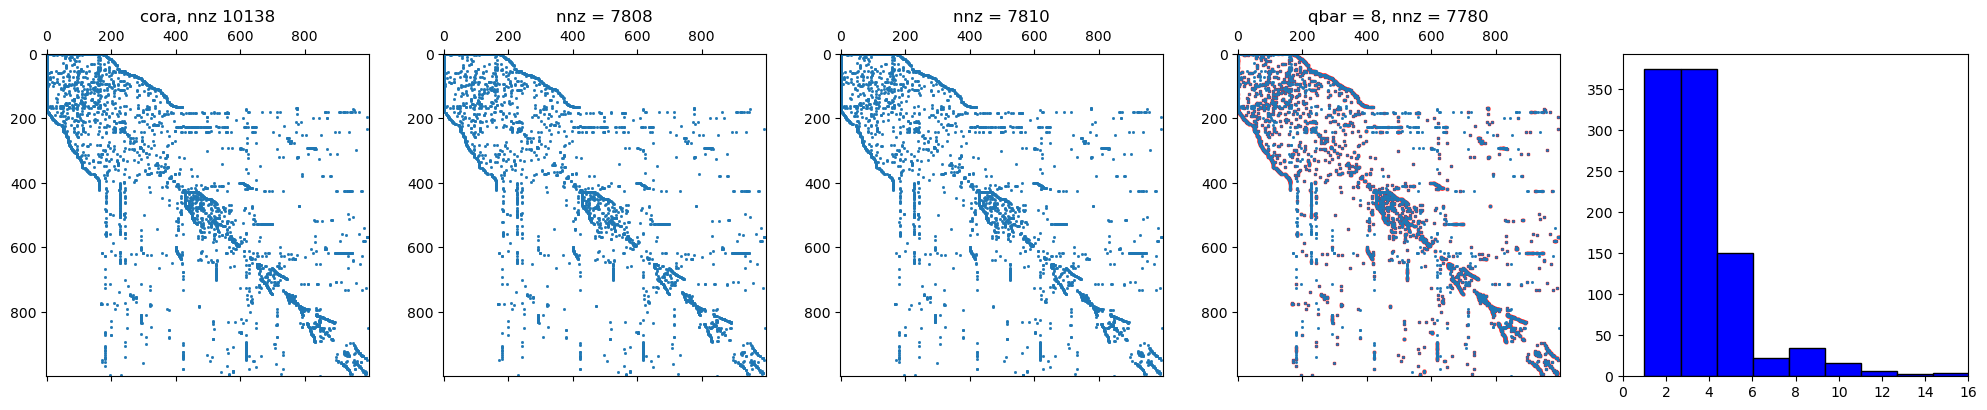

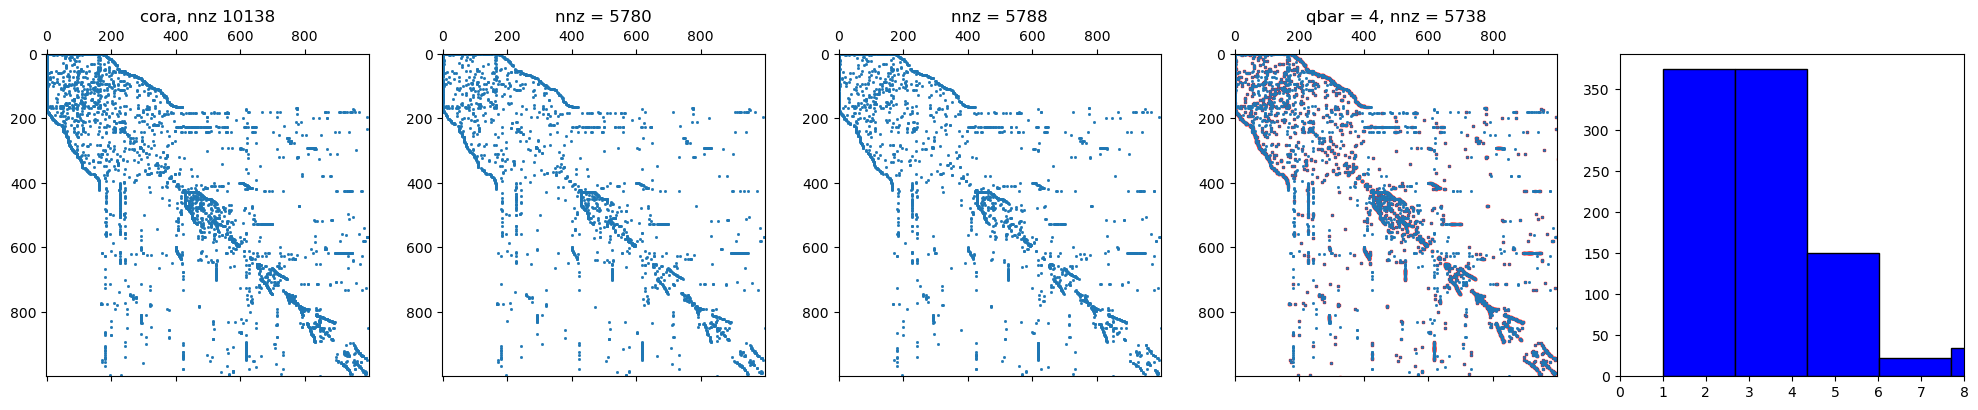

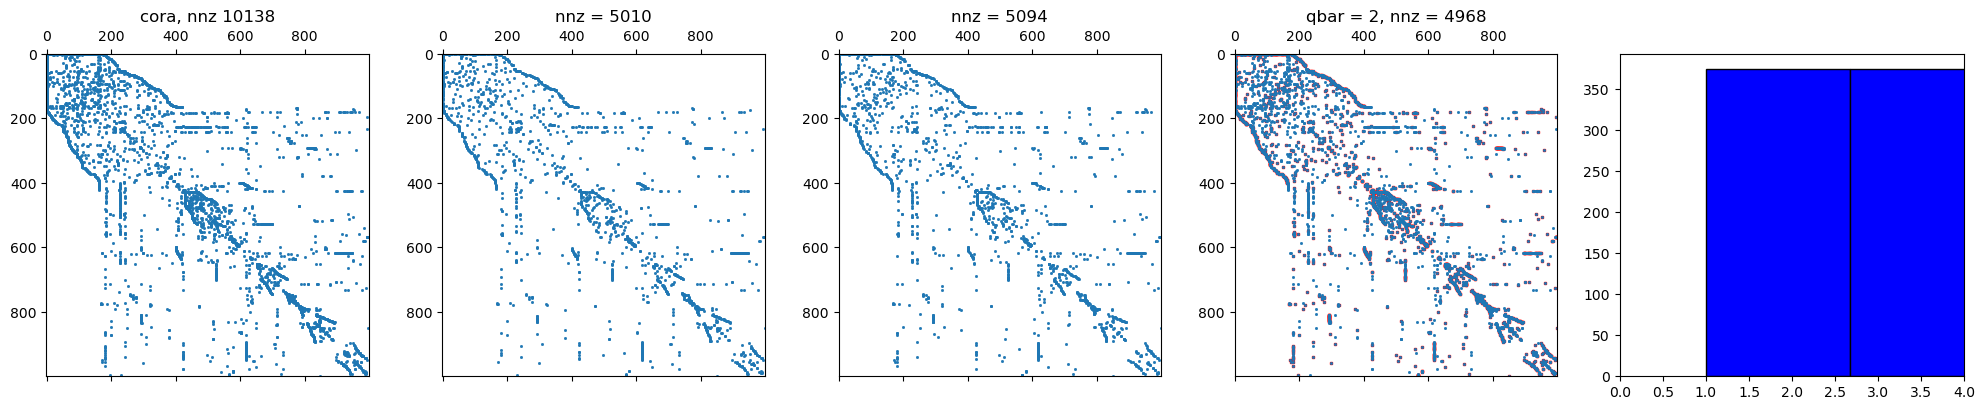

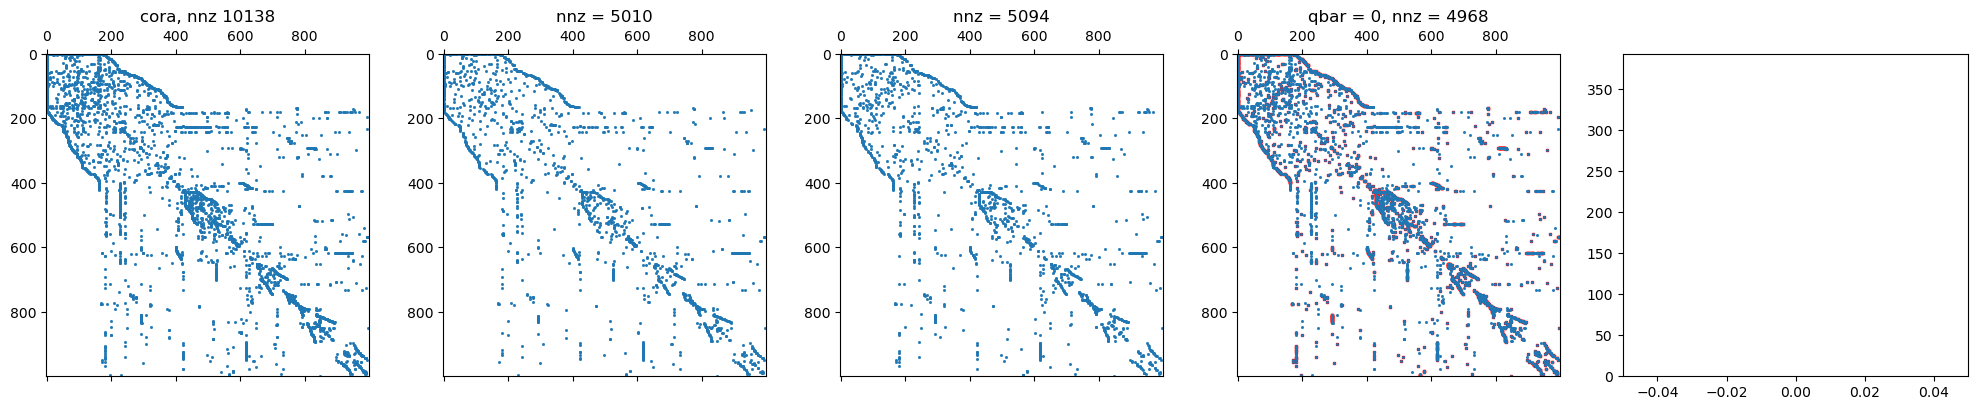

In [11]:
# Solve without coarsening, for baseline results


#dataset_list = ['pubmed']
for dataset in dataset_list:
    
    
    adj_matrix, labels = load_graph_data(dataset)
    if not isinstance(adj_matrix, csr_matrix):
        adj_matrix = csr_matrix(adj_matrix)        
    n = len(labels)
    num_classes = max(labels)+1
    
    
    
    sparse_adj_matrix = csr_matrix(adj_matrix)
    mat = {'orig':sparse_adj_matrix}
    
    for sparselevel in [2,1,.5,.1]:
        for sparse in ['influencer','uniform','resistive']:
            print(n)
            if n > 10000 and sparse == 'resistive': continue
            if sparse == 'influencer':
                node_degrees = sparse_adj_matrix.getnnz(axis=1)
                c = int(np.round(np.mean(node_degrees)*sparselevel))
                print(c)
                if c == 0: continue

                expstring = '%s_sparse%s_c%d_spmat' % (dataset,sparse,c)
            else:
                
                if c == 0: continue
                p = np.round(100*mat['influencer'].nnz / mat['orig'].nnz)/100
                expstring = '%s_sparse%s_p%f_spmat' % (dataset,sparse,p)

            print(expstring)
            try:

                adj_matrix = pickle.load(open('offline_sparsify/%s.pkl' % expstring,'rb'))

            except:

                if sparse == 'uniform':
                    adj_matrix,_ = uniform_sparsify(sparse_adj_matrix, p)
                elif sparse == 'resistive':
                    adj_matrix,_ = resistive_sparsify(sparse_adj_matrix, p)
                elif sparse == 'influencer':
                    adj_matrix = influencer_sparsify(sparse_adj_matrix, c)


                pickle.dump(adj_matrix, open('offline_sparsify/%s.pkl' % expstring,'wb'))

            mat[sparse] = adj_matrix
            
            

            #row1, col1 = sparse_adj_matrix.nonzero()
            #row2, col2 = adj_matrix.nonzero()
            #edges1 = [(row1[i],col1[i]) for i in range(len(row1))]
            #edges2 = [(row2[i],col2[i]) for i in range(len(row2))]
            #nested_edges = [e for e in edges2 if e not in edges1]
            #assert len(nested_edges) == 0
            

            

        max_n = int(np.minimum(n, 1000))
        print(max_n)
        plt.figure(figsize = (20,4))
         
        plt.subplot(1,5,1)
        
        plt.spy(mat['orig'][:max_n,:max_n], markersize=1)
        plt.title('%s, nnz %d' % (dataset,mat['orig'].nnz))

       
        plt.subplot(1,5,2)
        plt.spy(mat['uniform'][:max_n,:max_n], markersize=1)
        plt.title('nnz = %d' % mat['uniform'].nnz)


        plt.subplot(1,5,3)

        if not(n > 10000 and sparse == 'resistive'):
            plt.spy(mat['resistive'][:max_n,:max_n], markersize=1)
            plt.title('nnz = %d' % mat['resistive'].nnz)
        

        plt.subplot(1,5,4)
        
        plt.spy(mat['influencer'], markersize=2,color='r')
        plt.spy(mat['orig'][:max_n,:max_n], markersize=1)
        plt.title('qbar = %d, nnz = %d' % (c,mat['influencer'].nnz))

        plt.subplot(1,5,5)
        row_degrees = mat['orig'][:max_n,:max_n].getnnz(axis=1)

        plt.hist(row_degrees, bins=100, color='blue', edgecolor='black')  # Plot histogram with 20 bins
        plt.xlim([0, c*2])
        plt.tight_layout()







In [12]:
beta = 0.25


for dataset in dataset_list:
    
    
    adj_matrix_orig, labels = load_graph_data(dataset)
    if not isinstance(adj_matrix_orig, csr_matrix):
        adj_matrix_orig = csr_matrix(adj_matrix_orig)        
    n = len(labels)
    num_classes = max(labels)+1
    
    mat = {}
    
    for sparselevel in [2,1,.5,.1]:
        for sparse in ['orig','influencer','uniform','resistive']:
            if n > 10000 and sparse == 'resistive': continue
            if not (sparse == 'orig'):

                if sparse == 'influencer':
                    node_degrees = adj_matrix_orig.getnnz(axis=1)
                    c = int(np.round(np.mean(node_degrees)*sparselevel))
                    if c == 0: continue
                    spmat_string = '%s_sparse%s_c%d_spmat' % (dataset,sparse,c)
                else:
                    if c == 0: continue
                    p = np.round(100*mat['influencer'].nnz / mat['orig'].nnz)/100
                    spmat_string = '%s_sparse%s_p%f_spmat' % (dataset,sparse,p)
                
                
                adj_matrix = pickle.load(open('offline_sparsify/%s.pkl' % spmat_string,'rb'))
            else:
                adj_matrix = adj_matrix_orig
            mat[sparse] = adj_matrix     


            Theta,nTheta, Y_onehot =  prepare_small_problems(adj_matrix,labels)


            for method in ['relax','reg']:



                if sparse == 'orig':
                    expstring = '%s_beta%f_run%s_sparse%s' % (dataset,beta,method,'orig')
                elif sparse == 'influencer':
                    expstring = '%s_beta%f_run%s_sparse%s_c%d' % (dataset,beta,method,sparse,c)
                else:
                    expstring = '%s_beta%f_run%s_sparse%s_p%f' % (dataset,beta,method,sparse,p)



                try:

                    out = pickle.load(open('offline_sparsify/%s.pkl' % expstring,'rb'))

                except:


                    if beta == 0.:
                        T = Theta
                        b = 1.

                    else:
                        b = beta 
                        T= beta * nTheta + (1. - beta) * eye(n)

                    sigma = ( Y_onehot.T @ (T @ Y_onehot)).diagonal().sum()

                    Delta = num_classes



                    if method == 'relax':
                        out = Relaxation(T.toarray(), sigma, Delta, Y_onehot.toarray())
                        Y_pred = out['y_pred']
                        q = out['q']
                        misclass = np.mean(np.sum(Y_pred*(1-Y_onehot.toarray()),axis=1))
                        out['misclass'] = misclass
                        out['Delta'] = Delta
                        out['sigma'] = sigma

                    elif method == 'reg':
                        out = RegularizeOrInterpolate(T.toarray(), sigma,  Y_onehot.toarray(), method = 'regularize')
                        Y_pred = out['y_pred']
                        q = out['q']
                        misclass = np.mean(np.sum(Y_pred*(1-Y_onehot.toarray()),axis=1))
                        out['misclass'] = misclass
                        out['sigma'] = sigma


                    pickle.dump(out, open('offline_sparsify/%s.pkl' % expstring,'wb'))

                print(expstring, out['misclass'])



political-blog_beta0.250000_runrelax_sparseorig 0.12929623567921442
political-blog_beta0.250000_runreg_sparseorig 0.06464811783960721
political-blog_beta0.250000_runrelax_sparseinfluencer_c55 0.13911620294599017
political-blog_beta0.250000_runreg_sparseinfluencer_c55 0.06464811783960721
political-blog_beta0.250000_runrelax_sparseuniform_p0.600000 0.11783960720130933
political-blog_beta0.250000_runreg_sparseuniform_p0.600000 0.07364975450081833
political-blog_beta0.250000_runrelax_sparseresistive_p0.600000 0.13175122749590834
political-blog_beta0.250000_runreg_sparseresistive_p0.600000 0.07937806873977087
political-blog_beta0.250000_runrelax_sparseorig 0.12929623567921442
political-blog_beta0.250000_runreg_sparseorig 0.06464811783960721
political-blog_beta0.250000_runrelax_sparseinfluencer_c27 0.14157119476268412
political-blog_beta0.250000_runreg_sparseinfluencer_c27 0.08265139116202946
political-blog_beta0.250000_runrelax_sparseuniform_p0.350000 0.12520458265139117
political-blog_beta

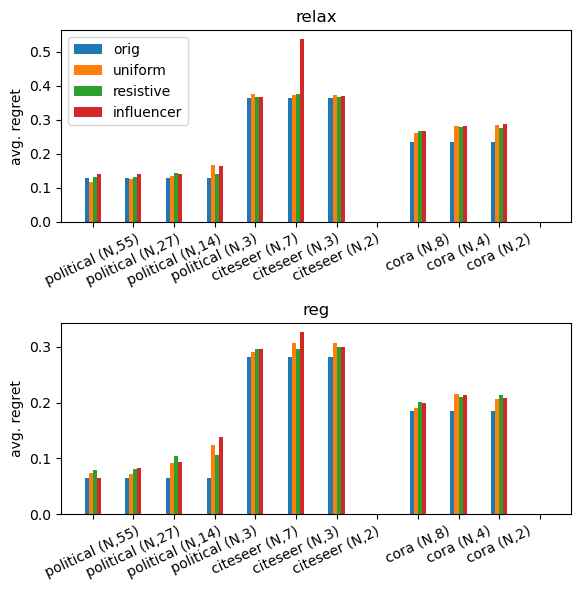

In [14]:

beta = .25
sparse_list = ['orig','influencer','uniform','resistive']
method_list = ['relax','reg']
splevel_list = [2,1,.5,.1]
misclass = np.zeros((len(dataset_list)*len(splevel_list), len(sparse_list), len(method_list)))  # 3D array to hold misclassification data


xlabels = [None for k in range(len(dataset_list)*len(splevel_list))]
for d,dataset in enumerate(dataset_list):
     
    mat = {}
    
    adj_matrix_orig, labels = load_graph_data(dataset)
    if not isinstance(adj_matrix_orig, csr_matrix):
        adj_matrix_orig = csr_matrix(adj_matrix_orig)        
    n = len(labels)
    num_classes = max(labels)+1
    
    for sl, sparselevel in  enumerate(splevel_list):
        
        node_degrees = adj_matrix_orig.getnnz(axis=1)
        c = int(np.round(np.mean(node_degrees)*sparselevel))
        if c == 0: continue
        
        for s,sparse in enumerate(sparse_list):

            if not (sparse == 'orig'):

                if sparse == 'influencer':
                    spmat_string = '%s_sparse%s_c%d_spmat' % (dataset,sparse,c)
                else:
                    p = np.round(100*mat['influencer'].nnz / mat['orig'].nnz)/100
                    spmat_string = '%s_sparse%s_p%f_spmat' % (dataset,sparse,p)

                adj_matrix = pickle.load(open('offline_sparsify/%s.pkl' % spmat_string,'rb'))
            else:
                adj_matrix = adj_matrix_orig
            mat[sparse] = adj_matrix     



 


            for m,method in enumerate(method_list):


                if sparse == 'orig':
                    expstring = '%s_beta%f_run%s_sparse%s' % (dataset,beta,method,'orig')
                elif sparse == 'influencer':
                    expstring = '%s_beta%f_run%s_sparse%s_c%d' % (dataset,beta,method,sparse,c)
                else:
                    expstring = '%s_beta%f_run%s_sparse%s_p%f' % (dataset,beta,method,sparse,p)


                if not(n > 10000 and sparse == 'resistive'):
                    out = pickle.load(open('offline_sparsify/%s.pkl' % expstring,'rb'))
                    misclass[d*len(splevel_list)+sl,s,m] = out['misclass']
                else:
                    misclass[d*len(splevel_list)+sl,s ,m] = np.nan
 
                xlabels[d*len(splevel_list)+sl] = '%s %s' % (dataset.split('-')[0],'(N,%d)' % c)
                
# Assuming 'misclass' is a 4D numpy array with dimensions [datasets, sparse, beta, methods]
# Example indices to focus on
dataset_index = 0  # Adjust as needed

# Number of sparse levels, betas, and methods (assuming these are known)
num_sparse = misclass.shape[1]
num_betas_datasets = misclass.shape[0]
num_methods = misclass.shape[2]

# Width of the bars
bar_width = 0.1

# Setting up the figure
fig, axs = plt.subplots(num_methods, 1, figsize=(6, 3 * num_methods))

# X axis positions for each beta, adjusted for each sparse list index
x_positions = np.arange(len(splevel_list)*len(dataset_list))

sidx_list = [0,2,3,1]
for m in range(num_methods):
    ax = axs[m] if num_methods > 1 else axs
    for si in range(len(sidx_list)):
        s = sidx_list[si]
        # Get misclassification rates for the specific dataset and method across all betas
        misclass_rates = misclass[:, s, m]

        # Adjust the position for each sparse list index
        ax.bar(x_positions + si * bar_width, misclass_rates, width=bar_width, label=sparse_list[s])


    # Configure the subplot
    ax.set_ylabel('avg. regret')
    ax.set_title(method_list[m])
    ax.set_xticks(x_positions + bar_width * (num_sparse - 1) / 2)
    ax.set_xticklabels([xlabels[i] for i in range(num_betas_datasets)], rotation=25)
    if m == 0: ax.legend()


plt.tight_layout()
plt.savefig('offline_smalldataset.png')
